This notebook is meant to give basic idea of how pedigree files were provided and what kinf of information they have. In addition, here is presented a basic statistics of raw files as well as highlighted some issues that could help in constructing the script for reformatting and merging 2 pedigrees.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6530/523115141.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1 Loading data

In [4]:
sheet_to_df_map = pd.read_excel("../data/raw_pedigree_part1.xlsx", 
                                sheet_name=None, 
                                dtype=str,
                                na_values=[" ", "", "None"]) # just to unify missing values

# the names of the sheets are:
# PedIDMatch (matching suffixes of genome id written in plink files with ped id), 
# PedNew (pedigree phenotypes info), 
# GenotypeIDs (info about genotypes)

pedid_match = sheet_to_df_map["PedIDMatch"]
ped_df = sheet_to_df_map["PedNew"]
geno_id = sheet_to_df_map["GenotypeIDs"]

# read a pedigree with additional 6k data without info on pedigree
ped_addit = pd.read_csv("../data/raw_pedigree_part2.csv", 
                        dtype=str, na_values=[" ", "", "None"], 
                        usecols=range(12)).query("id.notna().values") # to read only those rows that has an actual records

##### PedIdMatch summary

In [5]:
pedid_match.head()

,Equinome ID,Horse Name,horse_id
0,82,A Goodlookin Broad,62
1,82_2,A Goodlookin Broad,62
2,CM012,Sadlers Wells,69
3,CM006,Fairy King,98
4,CM015,Turtle Island,106


In [6]:
pedid_match["Equinome ID"].nunique()

14695

In [7]:
pedid_match["horse_id"].nunique()

13877

In [8]:
pedid_match.shape

(14695, 3)

In [9]:
pedid_match.groupby("horse_id", as_index=False).agg({"Equinome ID": "count"}).query("`Equinome ID` > 1").shape

(762, 2)

In [10]:
pedid_match.groupby("horse_id", as_index=False).agg({"Equinome ID": "count"}).query("`Equinome ID` > 2").shape

(56, 2)

In [11]:
pedid_match.groupby("horse_id", as_index=False).agg({"Equinome ID": "count"}).query("`Equinome ID` > 3").shape

(0, 2)

In [12]:
pedid_match.shape

(14695, 3)

In [13]:
pedid_match.isna().any()

Equinome ID    False
Horse Name     False
horse_id       False
dtype: bool

##### PedNew summary

In [15]:
# PedNew
ped_df.head()

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
0,7,0,battle joined,3,6,1959,1,b.,USA
1,177841,0,armed venus,3,452020,1958,2,b.,USA
2,448331,0,gentility,3,448330,1961,2,b.,USA
3,15,0,ack ack,7,14,1966,1,b.,USA
4,383725,0,jungle war,7,383724,1964,2,b.,USA


In [16]:
ped_df.shape

(68655, 9)

In [17]:
ped_df.id.nunique()

68655

In [21]:
ped_df[ped_df.duplicated(["name", "dam_id", "YOB"], keep=False)]

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
56785,196235,3,abadan,NaN,NaN,NaN,1,NaN,GB
56792,265453,3,abadan,NaN,NaN,NaN,1,NaN,GB
56796,385381,3,abbots trace,NaN,NaN,NaN,1,NaN,IRE
56797,455953,3,abbots trace,NaN,NaN,NaN,1,NaN,IRE
56836,473013,3,abbots trace,NaN,NaN,NaN,1,NaN,IRE
...,...,...,...,...,...,...,...,...,...
68630,385541,3,zingara,NaN,NaN,NaN,2,NaN,FR
68631,444915,3,zingara,NaN,NaN,NaN,2,NaN,FR
68650,190775,3,zvornik,NaN,NaN,NaN,1,NaN,AUS
68651,295979,3,zvornik,NaN,NaN,NaN,1,NaN,AUS


In [22]:
ped_df.isna().sum()

id             0
status         0
name           2
sire_id    11871
dam_id     11871
YOB         9927
sex         1944
colour     14813
COB         4032
dtype: int64

In [23]:
ped_df.apply(lambda x: ((1-(x.count()/x.size))*100).round(2)) 

id          0.00
status      0.00
name        0.00
sire_id    17.29
dam_id     17.29
YOB        14.46
sex         2.83
colour     21.58
COB         5.87
dtype: float64

##### GenoId summary

In [24]:
geno_id.head()

,id,batchID,equinomeID,SNPChip,Year of Birth,Country Reported,sex
0,20160112_JSB001_409,20160112,JSB001_409,SNP670,1971,Ireland,Female
1,20141029_CM108,20141029,CM108,SNP70,1973,Ireland,Female
2,20100101_CM002,20100101,CM002,SNP50,1974,Ireland,Male
3,20100101_CM104,20100101,CM104,SNP50,1975,Ireland,Female
4,20141029_CM110,20141029,CM110,SNP70,1976,Ireland,Female


In [25]:
geno_id.shape

(11183, 7)

In [26]:
geno_id.id.nunique()

11183

In [27]:
geno_id.equinomeID.nunique()

11107

##### Ped Additional summary

In [28]:
ped_addit.head()

,id,batchID,equinomeID,SNPChip,Year of Birth,sex,Country Reported,Horse Name,Sire,Dam,Month of Birth,Country of Birth
0,20100101_103,20100101,103,SNP50,2003,Male,New Zealand,Condesire,Traditionally,Fine Feather,September,New Zealand
1,20100101_GB5,20100101,GB5,SNP50,1999,Female,Ireland,Susan Glen,Sacrament,SanvacGlen,May,Ireland
2,20100101_GF01,20100101,GF01,SNP50,2000,Male,Ireland,Rossmore Castle,WitnessBox,LatinQuarter,June,Ireland
3,20100101_GF03,20100101,GF03,SNP50,2003,Male,Ireland,Radiator Rooney,Elnadim,QueenofTheMay,April,Ireland
4,20100101_JSB049,20100101,JSB049,SNP50,2004,Female,Ireland,Ambereen,Lils Boy,Aeraiocht,February,Ireland


In [29]:
ped_addit.columns

Index(['id', 'batchID', 'equinomeID', 'SNPChip', 'Year of Birth', 'sex',
       'Country Reported', 'Horse Name', 'Sire', 'Dam', 'Month of Birth',
       'Country of Birth'],
      dtype='object')

In [30]:
ped_addit.shape

(5814, 12)

In [31]:
ped_addit[ped_addit.duplicated("id")]

,id,batchID,equinomeID,SNPChip,Year of Birth,sex,Country Reported,Horse Name,Sire,Dam,Month of Birth,Country of Birth


In [32]:
ped_addit[ped_addit.duplicated("equinomeID", keep=False)] \
    .sort_values("equinomeID")

,id,batchID,equinomeID,SNPChip,Year of Birth,sex,Country Reported,Horse Name,Sire,Dam,Month of Birth,Country of Birth
83,20141020_BAR001_021,20141020,BAR001_021,SNP70,2012,Male,Australia,Yum Sing,Congrats,Hennessy Belle,October,Australia
1605,20160627_BAR001_021,20160627,BAR001_021,SNP70,2012,Male,Australia,Yum Sing,Congrats,Hennessy Belle,October,Australia
1608,20160627_BAR001_032,20160627,BAR001_032,SNP70,2012,Male,Australia,Congratulations,Congrats,Double Strength,September,Australia
410,20150105_BAR001_032,20150105,BAR001_032,SNP70,2012,Male,Australia,Congratulations,Congrats,Double Strength,September,Australia
2103,20170214_CUM001_117,20170214,CUM001_117,SNP70_PVL,2013,Female,Great Britain,Angela North,Canford Cliffs,Vallota,April,Great Britain
...,...,...,...,...,...,...,...,...,...,...,...,...
838,20150813_SFI152,20150813,SFI152,SNP670,2012,Male,Ireland,Family Pride,Proud Citizen,Family,March,Ireland
427,20150105_TLS001_002,20150105,TLS001_002,SNP70,2012,Female,Australia,Noaf,Commands,Crossyourheart,September,Australia
1601,20160614_TLS001_002,20160614,TLS001_002,SNP70,2012,Female,Australia,Noaf,Commands,Crossyourheart,September,Australia
429,20150105_WPS001_010,20150105,WPS001_010,SNP70,2012,Male,Australia,Astro Fame,Encosta de Lago,Special Episode,September,Australia


In [33]:
ped_df.head()

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
0,7,0,battle joined,3,6,1959,1,b.,USA
1,177841,0,armed venus,3,452020,1958,2,b.,USA
2,448331,0,gentility,3,448330,1961,2,b.,USA
3,15,0,ack ack,7,14,1966,1,b.,USA
4,383725,0,jungle war,7,383724,1964,2,b.,USA


## Issue with repetitions

In [5]:
cleaned_pedigree = pd.read_csv("../results/cleaned_first_ped.csv", dtype="str")
cleaned_pedigree.head()

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
0,7,0,battle joined,3,6,1959,1,b.,USA
1,177841,0,armed venus,3,452020,1958,2,b.,USA
2,448331,0,gentility,3,448330,1961,2,b.,USA
3,15,0,ack ack,7,14,1966,1,b.,USA
4,383725,0,jungle war,7,383724,1964,2,b.,USA


In [6]:
cleaned_pedigree.shape

(68655, 9)

##### 1. How many inidividuals have the same name

In [7]:
cleaned_pedigree[cleaned_pedigree.duplicated(["name"], keep=False)].shape

(14974, 9)

In [8]:
cleaned_pedigree[~cleaned_pedigree.name.isna() & cleaned_pedigree.duplicated(["name"], keep=False)].sort_values("name")

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
56792,265453,3,abadan,NaN,NaN,NaN,1,NaN,GB
30220,72702,0,abadan,18943,415195,1947,1,b.,GB
56785,196235,3,abadan,NaN,NaN,NaN,1,NaN,GB
21609,259580,0,abashed,6508,259579,2002,2,b.,AUS
9055,1034,1,abashed,1013,1033,2017,2,ch.,USA
...,...,...,...,...,...,...,...,...,...
68646,484564,3,zuleika,NaN,NaN,NaN,2,NaN,GB
25683,253997,0,zvornik,11756,401160,1965,1,b.,AUS
68650,190775,3,zvornik,NaN,NaN,NaN,1,NaN,AUS
68651,295979,3,zvornik,NaN,NaN,NaN,1,NaN,AUS


In [9]:
# in the dataset we have 14,972 out of 68,655 (22%!!!) idividuals that have non unique name


In [10]:
reps = cleaned_pedigree[~cleaned_pedigree.name.isna() & cleaned_pedigree.duplicated(["name"], keep=False)]
reps.isna().sum()

id            0
status        0
name          0
sire_id    6923
dam_id     6924
YOB        6709
sex         214
colour     7121
COB         315
dtype: int64

In [11]:
(reps["dam_id"].isna() & reps["sire_id"].isna()).sum()

6923

In [12]:
(reps["dam_id"].isna() & reps["sire_id"].isna() & reps["YOB"].isna()).sum()

6709

In [13]:
# 6,923 of those don't have info on parents and 6,709 don't have parent and YOB info

array([[<Axes: title={'center': 'id'}>]], dtype=object)

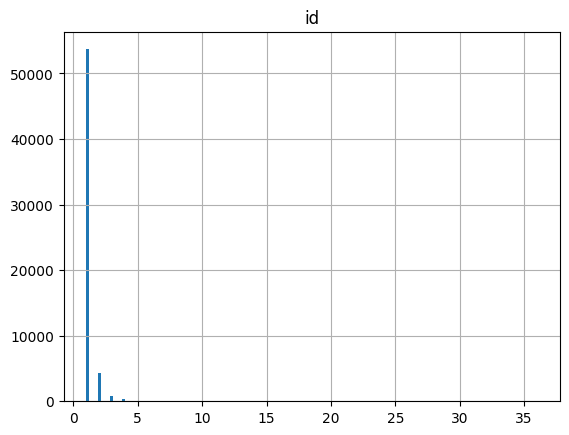

In [14]:
cleaned_pedigree.groupby(["name"], as_index=False).agg({"id":"count"}).hist(bins=150)

## How common is to have the same name

In [18]:
grouped = reps.groupby(["name"], as_index=False).agg(
    dam_id_count=("dam_id", "count"), 
    dam_id_nunique=("dam_id", pd.Series.nunique) 
)

same_dam_id_count = grouped[(grouped["dam_id_nunique"] == 1) & (grouped["dam_id_count"] > 1)].shape[0]
different_dam_id_count = grouped[grouped["dam_id_nunique"] > 1].shape[0]

print(f"Number of groups with the same name and the same dam_id: {same_dam_id_count}")
print(f"Number of groups with the same name and different dam_id: {different_dam_id_count}")

Number of groups with the same name and the same dam_id: 5
Number of groups with the same name and different dam_id: 2277


In [16]:
grouped

,name,dam_id_count,dam_id_nunique
0,abadan,3,1
1,abashed,2,2
2,abbazia,2,2
3,abbots anne,2,1
4,abbots trace,4,1
...,...,...,...
5791,zorina,3,3
5792,zria,2,1
5793,zucchero,2,1
5794,zuleika,2,1


In [139]:
reps[reps["name"]=="abadan"]

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
30220,72702,0,abadan,18943,415195,1947,1,b.,GB
56785,196235,3,abadan,NaN,NaN,NaN,1,NaN,GB
56792,265453,3,abadan,NaN,NaN,NaN,1,NaN,GB


In [21]:
reps.isna().sum()

id            0
status        0
name          0
sire_id    6923
dam_id     6924
YOB        6709
sex         214
colour     7121
COB         315
dtype: int64

In [22]:
reps.shape

(14972, 9)

In [23]:
14974-6924

8050

In [27]:
# distribution of name frequency for the same dam_id
reps.groupby(["dam_id", "name"], as_index=False).agg({"id":"count"}).id.value_counts(normalize=True)

id
1    0.999254
2    0.000746
Name: proportion, dtype: float64

In [25]:
reps.groupby(["dam_id", "name"], as_index=False).agg({"id":"count"}).sort_values("id",ascending=False).head(10)

,dam_id,name,id
879,171603,key factor,2
2074,290725,second fiddle,2
7737,81785,mashka,2
211,118872,formal invitation,2
236,120793,sandarac,2
75,106820,let the heirs walk,2
5357,433435,helene,1
5358,433437,divine,1
5359,433461,cooya,1
5360,433463,actor,1


In [30]:
rep_names=reps.groupby(["dam_id", "name"], as_index=False).agg({"id":"count"}).query("id > 1").name

cleaned_pedigree[cleaned_pedigree["name"].isin(rep_names)].sort_values("name")

,id,status,name,sire_id,dam_id,YOB,sex,colour,COB
15055,118873,0,formal invitation,2826,118872,1979,2,b.,IRE
15083,522450,0,formal invitation,2826,118872,1980,2,b.,IRE
35411,171604,1,key factor,46345,171603,2014,2,NaN,NaN
35421,595265,1,key factor,46345,171603,2015,2,gr.,AUS
15025,584967,1,let the heirs walk,2819,106820,2014,1,b.,IRE
42393,185538,1,let the heirs walk,185521,106820,2008,2,b.,IRE
33264,81786,0,mashka,31148,81785,1974,2,NaN,SAF
33268,233954,0,mashka,31148,81785,1972,2,ch.,SAF
4832,161568,0,sandarac,340,120793,1987,2,b.,NZ
4848,518392,0,sandarac,340,120793,1986,2,b.,NZ


In [ ]:
# for some reason it differs from earlier way

6 pairs have the same name and the same mother out of 68,655 total individuals

In [31]:
cleaned_pedigree.groupby(["dam_id","sire_id", "name"], as_index=False).agg({"id":"count"}).id.value_counts(normalize=True)

id
1    0.999912
2    0.000088
Name: proportion, dtype: float64

In [32]:
cleaned_pedigree.groupby(["YOB", "name"], as_index=False).agg({"id":"count"}).id.value_counts(normalize=True)

id
1    0.998072
2    0.001928
Name: proportion, dtype: float64

In [33]:
cleaned_pedigree.groupby(["dam_id","YOB", "name"], as_index=False).agg({"id":"count"}).id.value_counts(normalize=True)

id
1    1.0
Name: proportion, dtype: float64

0,012% of individuals have the same name and the same mother; 0,0088% have the same parents and the same name; 0% have the same year of birth and the same name.

In [36]:
reps.groupby(["name"], as_index=False).agg{"dam_id":pd}